### Did you know?


**You can solve regression problems in 3 lines of code. There is an inbuilt function in numpy called
linalg that SAVES LIVES (of Statisticians atleast).**


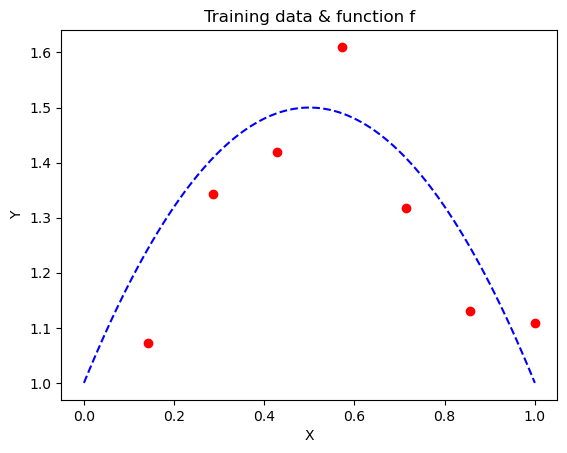

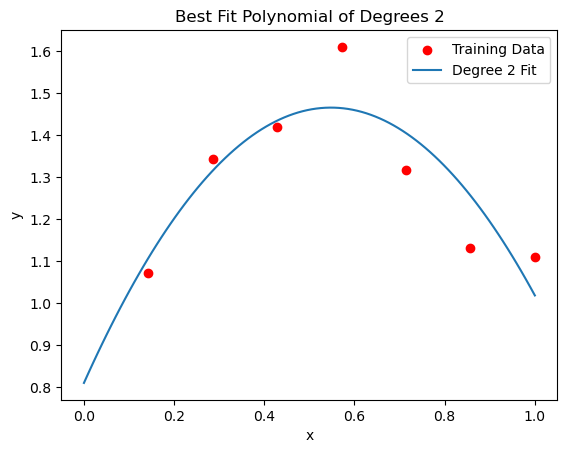

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 + 2*x - 2*x**2

noise = np.random.normal(0,1,7)
X, Y, F = [], [], []
for i in range(7):
    x = (i+1)/7
    y = f(x)
    X.append(x)
    F.append(y)
    Y.append(y + 0.1*noise[i])

plt.figure()
plt.scatter(X, Y, label='Training Data', color='red')
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y, label='True Function', linestyle='--', color='blue')
plt.title("Training data & function f")
plt.xlabel("X")
plt.ylabel("Y")

d = 2

degrees = np.arange(7)
MSE, MSE_test = [], []
X_copy = X
x_test, y_test, f_test = [], [], []
noise = np.random.normal(0, 1, 1000) # guassian noise - mean 0, standard deviation 1. I am sampling 1000 points from this distribution.
for idx in range(1000):
    xVal = (idx+1)/1000
    fVal = f(xVal)
    yVal = fVal + 0.1*noise[idx]
    x_test.append(xVal)
    y_test.append(yVal)

# Solve for our parameters.
X = np.vander(X_copy, d+1, increasing=True)
# print(X)
theta = np.linalg.solve(X.T @ X, X.T @ Y) # Yup, thats it :)
y_fit = np.polyval(np.flip(theta), x)

plt.figure()
plt.scatter(X_copy, Y, label='Training Data', color='red')
plt.plot(x, y_fit, label=f'Degree {d} Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Polynomial of Degrees ' + str(d))
plt.legend()

## Homework: Can you figure out what np.polyval and np.vander is doing here?

### Note:
Here the curve being fit is quadratic in nature.
This is polynomial regression. But the model is still linear because we are defining the linearity w.r.t the model parameters Theta.

The term "linear" implies that the dependent variable y is a linear function of the parameters $\theta$ and the features x. Even if the features are transformed (e.g., squared, log-transformed), the model is still considered linear if the parameters enter the equation in a linear manner. The non-linearity can exist in the features, but not in the way the parameters are used. 
Simply put: Linear combination on non linear variables.